# Multiple Regression

Simple Linear Regression:

$$y = \beta_0 + \beta_1X$$

Multiple Linear Regression:

$$y = \beta_0 + \beta_1X_1 + \beta_2X_2 + ...$$

Well studied field in statistics

Focus will be on what is relevant for Data Science - practical and relevant for prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df.shape

(506, 14)

In [5]:
df.dropna(inplace=True)

# Statsmodels

In [6]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

We need to add a constant term to allow statsmodel.api to calculate the bias / intercepts.

In [7]:
sm.OLS?

In [8]:
X = df.iloc[:, :-1]
y = df.iloc[:,-1]

In [9]:
y

0      24.0
1      21.6
2      34.7
3      33.4
5      28.7
       ... 
499    17.5
500    16.8
502    20.6
503    23.9
504    22.0
Name: MEDV, Length: 394, dtype: float64

In [10]:
model = sm.OLS(y, X)

In [11]:
lr = model.fit()

In [12]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   MEDV   R-squared (uncentered):                   0.964
Model:                            OLS   Adj. R-squared (uncentered):              0.963
Method:                 Least Squares   F-statistic:                              780.6
Date:                Wed, 24 Jul 2024   Prob (F-statistic):                   2.74e-265
Time:                        10:49:44   Log-Likelihood:                         -1159.9
No. Observations:                 394   AIC:                                      2346.
Df Residuals:                     381   BIC:                                      2397.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0843      0.034     -2.502      0.013      -0.151      -0.018
ZN             0.0513      0.015      3.423      0.001       0.022       0.081
INDUS          0.0019      0.068      0.027      0.978      -0.133       0.136
CHAS           2.8331      0.963      2.941      0.003       0.939       4.727
NOX           -4.5181      3.686     -1.226      0.221     -11.766       2.730
RM             6.2325      0.340     18.322      0.000       5.564       6.901
AGE           -0.0210      0.015     -1.399      0.163      -0.050       0.009
DIS           -1.0272      0.205     -5.002      0.000      -1.431      -0.623
RAD            0.1692      0.069      2.452      0.015       0.034       0.305
TAX           -0.0106      0.004     -2.591      0.010      -0.019      -0.003
PTRATIO       -0.4409      0.119     -3.716      0.000      -0.674      -0.208
B              0.0152      0.003      5.209      0.000       0.009       0.021
LSTAT         -0.3163      0.054     -5.869      0.000      -0.422      -0.210
==============================================================================
Omnibus:                      170.901   Durbin-Watson:                   1.203
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1305.548
Skew:                           1.657   Prob(JB):                    3.19e-284
Kurtosis:                      11.279   Cond. No.                     8.77e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

There are a lot of statistical tests and information. Mostly for the purpose of statistical analysis.

You do not need all of these for data science.

Data science focus is on prediction and having models that work on predicting real data. It is not concerned as much with  correct specifications of statistical problems.

## Model Statistical Outputs:

**Dep. Variable**: The dependent variable or target variable

**Model**: Highlight the model used to obtain this output. It is OLS here. Ordinary least squares / Linear regression

**Method**: The method used to fit the data to the model. Least squares

**No. Observations**: The number of observations

**DF Residuals**: The degrees of freedom of the residuals. Calculated by taking the number of observations less the number of parameters

**DF Model**: The number of estimated parameters in the model. In this case 13. The constant term is not included.


**R-squared**: This is the coefficient of determination. Measure of goodness of fit.
$$R^2=1-\frac{SS_{res}}{SS_{tot}}$$

> From [wiki](https://en.wikipedia.org/wiki/Coefficient_of_determination),

  > The total sum of squares, $SS_{tot}=\sum_i(y_i-\bar{y})^2$

  > The regression sum of squares (explained sum of squares), $SS_{reg}=\sum_i(f_i-\bar{y})^2$

  > The sum of squares of residuals (residual sum of squares), $SS_{res}=\sum_i(y_i-f_i)^2 = \sum_ie^2_i$

**Adj. R-squared**: This is the adjusted R-squared. It is the coefficient of determination adjusted by sample size and the number of parameters used.
$$\bar{R}^2=1-(1-R^2)\frac{n-1}{n-p-1}$$

> $p$ = The total number of explanatory variables not including the constant term

> $n$ = The sample size

**F-statistic**: A measure that tells you if you model is different from a simple average.

**Prob (F-statistic)**: This measures the significance of your F-statistic. Also called p-value of F-statistic. In statistics, p-value equal or lower than 0.05 is considered significant.

**AIC**: This is the Akaike Information Criterion. It evaluatess the model based on the model complexity and number of observations. The lower the better. 

**BIC**: This is the Bayesian Information Criterion. Similar to AIC, except it pushishes models with more parameters.

## Parameters Estimates and the Associated Statistical Tests

**coef**: The estimated coefficient. Note that this is just a point estimate.

**std err**: The standard error of the estimate of the coefficient. Another term for standard deviation

**t**: The t-statistic score. 

**P > |t|**: The p-value. A measure of the probability that the coefficient is different from zero.

**[95.0% Conf. Interval]**: The 95% confidence interval of the coefficient. Shown here as [0.025, 0.975], the lower and upper bound.

## Residual Tests

**Omnibus D'Angostino's test**: This is a combined statistical test for skewness and kurtosis.

**Prob(Omnibus)**: p-value of Omnibus test.

**Skewness**: This is a measure of the symmetry of the residuals around the mean. Zero if symmetrical. A positive value indicates a long tail to the right; a negative value a long tail to the left.

**Kurtosis**: This is a measure of the shape of the distribution of the residuals. A normal distribution has a zero measure. A negative value points to a flatter than normal distribution; a positive one has a higher peak than normal distribution.

**Durbin-Watson**: This is a test for the presence of correlation among the residuals. This is especially important for time series modelling

**Jarque-Bera**: This is a combined statistical test of skewness and kurtosis.

**Prob (JB)**: p-value of Jarque-Bera.

**Cond. No**: This is a test for multicollinearity. > 30 indicates unstable results

***

# statsmodels.formula.api

In [13]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
mlr = form_lr.fit()

In [14]:
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.759
Method:                 Least Squares   F-statistic:                     96.29
Date:                Wed, 24 Jul 2024   Prob (F-statistic):          1.75e-111
Time:                        10:49:45   Log-Likelihood:                -1143.4
No. Observations:                 394   AIC:                             2315.
Df Residuals:                     380   BIC:                             2370.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.6801      5.681      5.752      0.000      21.509      43.851
CRIM          -0.0976      0.032     -3.007      0.003      -0.161      -0.034
ZN             0.0489      0.014      3.397      0.001       0.021       0.077
INDUS          0.0304      0.066      0.461      0.645      -0.099       0.160
CHAS           2.7694      0.925      2.993      0.003       0.950       4.588
NOX          -17.9690      4.243     -4.235      0.000     -26.311      -9.627
RM             4.2833      0.471      9.100      0.000       3.358       5.209
AGE           -0.0130      0.014     -0.898      0.370      -0.041       0.015
DIS           -1.4585      0.211     -6.912      0.000      -1.873      -1.044
RAD            0.2859      0.069      4.125      0.000       0.150       0.422
TAX           -0.0131      0.004     -3.324      0.001      -0.021      -0.005
PTRATIO       -0.9146      0.141     -6.506      0.000      -1.191      -0.638
B              0.0097      0.003      3.251      0.001       0.004       0.015
LSTAT         -0.4237      0.055     -7.700      0.000      -0.532      -0.315
==============================================================================
Omnibus:                      161.243   Durbin-Watson:                   1.247
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              904.814
Skew:                           1.657   Prob(JB):                    3.33e-197
Kurtosis:                       9.643   Cond. No.                     1.57e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Exercise

In [15]:
form_lr = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM', 
              data=df)
mlr = form_lr.fit()
mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     111.4
Date:                Wed, 24 Jul 2024   Prob (F-statistic):           3.69e-81
Time:                        10:49:45   Log-Likelihood:                -1232.8
No. Observations:                 394   AIC:                             2480.
Df Residuals:                     387   BIC:                             2507.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -19.0213      3.475     -5.474      0.000     -25.854     -12.189
CRIM          -0.1621      0.034     -4.735      0.000      -0.229      -0.095
ZN             0.0294      0.014      2.050      0.041       0.001       0.058
INDUS         -0.1418      0.067     -2.120      0.035      -0.273      -0.010
CHAS           4.5489      1.129      4.029      0.000       2.329       6.768
NOX           -7.8802      4.039     -1.951      0.052     -15.822       0.062
RM             7.5239      0.453     16.627      0.000       6.634       8.414
==============================================================================
Omnibus:                      145.668   Durbin-Watson:                   1.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.271
Skew:                           1.448   Prob(JB):                    2.12e-188
Kurtosis:                       9.653   Cond. No.                         441.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

***

# Correlation Matrix

Useful diagnostic tool to identify collinearity between predictors



In [16]:
pd.options.display.float_format = '{:,.4f}'.format
corr_matrix = df.corr()
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,-0.1881,0.3916,-0.0520,0.4162,-0.2272,0.3413,-0.3651,0.6087,0.5608,0.2654,-0.3863,0.4619,-0.3972
ZN,-0.1881,1.0000,-0.5213,-0.0334,-0.5157,0.3432,-0.5682,0.6454,-0.2988,-0.3058,-0.4222,0.1699,-0.4150,0.4068
INDUS,0.3916,-0.5213,1.0000,0.0498,0.7627,-0.4031,0.6424,-0.6966,0.5919,0.7342,0.3957,-0.3448,0.5982,-0.5108
CHAS,-0.0520,-0.0334,0.0498,1.0000,0.0767,0.0953,0.0726,-0.0950,0.0141,-0.0265,-0.1050,0.0689,-0.0371,0.1737
NOX,0.4162,-0.5157,0.7627,0.0767,1.0000,-0.3166,0.7325,-0.7681,0.6282,0.6798,0.2102,-0.3843,0.5937,-0.4591
RM,-0.2272,0.3432,-0.4031,0.0953,-0.3166,1.0000,-0.2487,0.2187,-0.2361,-0.3206,-0.3907,0.1233,-0.6362,0.7240
AGE,0.3413,-0.5682,0.6424,0.0726,0.7325,-0.2487,1.0000,-0.7535,0.4436,0.5045,0.2650,-0.2820,0.6011,-0.4075
DIS,-0.3651,0.6454,-0.6966,-0.0950,-0.7681,0.2187,-0.7535,1.0000,-0.4771,-0.5296,-0.2288,0.2852,-0.5050,0.2795
RAD,0.6087,-0.2988,0.5919,0.0141,0.6282,-0.2361,0.4436,-0.4771,1.0000,0.9000,0.4419,-0.4441,0.5109,-0.4166
TAX,0.5608,-0.3058,0.7342,-0.0265,0.6798,-0.3206,0.5045,-0.5296,0.9000,1.0000,0.4470,-0.4355,0.5722,-0.5089


In [17]:
corr_matrix[np.abs(corr_matrix) < 0.6] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6087,0.0000,0.0000,0.0000,0.0000,0.0000
ZN,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.6454,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
INDUS,0.0000,0.0000,1.0000,0.0000,0.7627,0.0000,0.6424,-0.6966,0.0000,0.7342,0.0000,0.0000,0.0000,0.0000
CHAS,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
NOX,0.0000,0.0000,0.7627,0.0000,1.0000,0.0000,0.7325,-0.7681,0.6282,0.6798,0.0000,0.0000,0.0000,0.0000
RM,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-0.6362,0.7240
AGE,0.0000,0.0000,0.6424,0.0000,0.7325,0.0000,1.0000,-0.7535,0.0000,0.0000,0.0000,0.0000,0.6011,0.0000
DIS,0.0000,0.6454,-0.6966,0.0000,-0.7681,0.0000,-0.7535,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
RAD,0.6087,0.0000,0.0000,0.0000,0.6282,0.0000,0.0000,0.0000,1.0000,0.9000,0.0000,0.0000,0.0000,0.0000
TAX,0.0000,0.0000,0.7342,0.0000,0.6798,0.0000,0.0000,0.0000,0.9000,1.0000,0.0000,0.0000,0.0000,0.0000


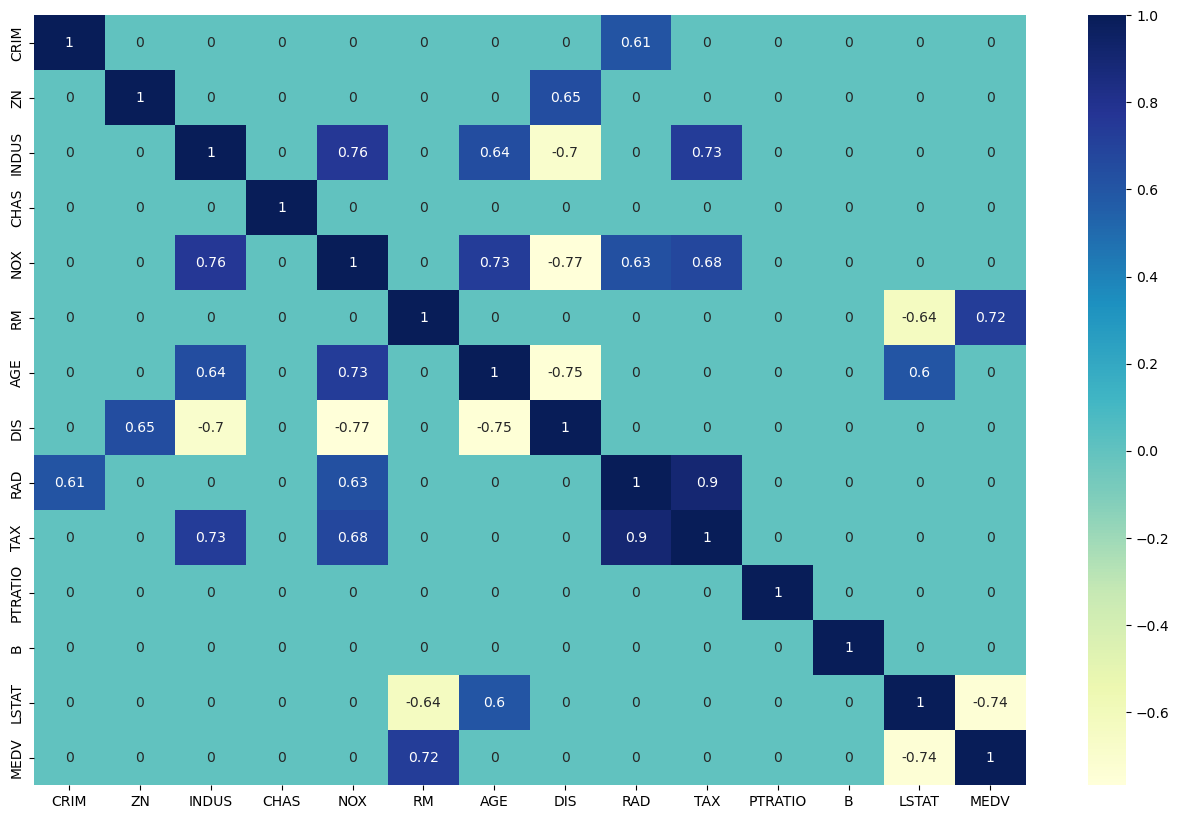

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')
plt.show()

## Detecting Collinearity with Eigenvectors

In [19]:
eigenvalues, eigenvectors = np.linalg.eig(df.corr())

In [20]:
pd.Series(eigenvalues).sort_values()

8    0.0618
10   0.1331
13   0.1781
12   0.2029
11   0.2389
9    0.2858
7    0.3863
6    0.5566
5    0.6648
4    0.8231
3    0.8961
2    1.3475
1    1.6154
0    6.6096
dtype: float64

Note that index 8, eigenvalue of 0.0635, is near to zero or very small compared to the others. Small value represents presence of collinearity. 

In [21]:
np.abs(pd.Series(eigenvectors[:,8])).sort_values(ascending=False)

9    0.6868
8    0.6143
2    0.2614
13   0.1659
4    0.1434
1    0.1084
7    0.0873
12   0.0665
0    0.0663
10   0.0647
6    0.0316
3    0.0238
11   0.0204
5    0.0126
dtype: float64

Note that index 9, 8, 2 have very high loading when compared against the rest

In [22]:
print(df.columns[2], df.columns[8], df.columns[9])

INDUS RAD TAX


These are the factors that are causing multicollinearity problem.

***

# Revisiting Feature Importance and Extractions

Check:

1. Direction of the coefficient
2. Impact of the variable / factor on the model

In [23]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.0063,18.0000,2.3100,0.0000,0.5380,6.5750,65.2000,4.0900,1,296,15.3000,396.9000,4.9800,24.0000
1,0.0273,0.0000,7.0700,0.0000,0.4690,6.4210,78.9000,4.9671,2,242,17.8000,396.9000,9.1400,21.6000
2,0.0273,0.0000,7.0700,0.0000,0.4690,7.1850,61.1000,4.9671,2,242,17.8000,392.8300,4.0300,34.7000
3,0.0324,0.0000,2.1800,0.0000,0.4580,6.9980,45.8000,6.0622,3,222,18.7000,394.6300,2.9400,33.4000
5,0.0299,0.0000,2.1800,0.0000,0.4580,6.4300,58.7000,6.0622,3,222,18.7000,394.1200,5.2100,28.7000


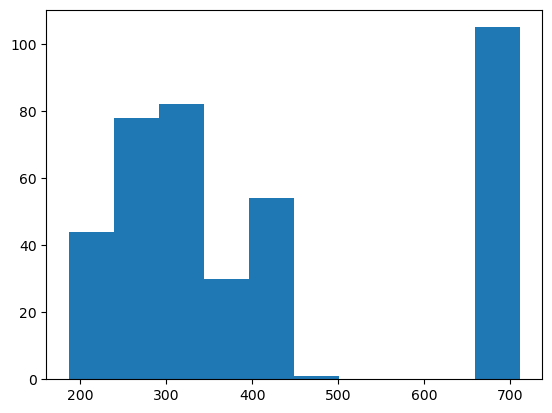

In [24]:
plt.hist(df['TAX']);

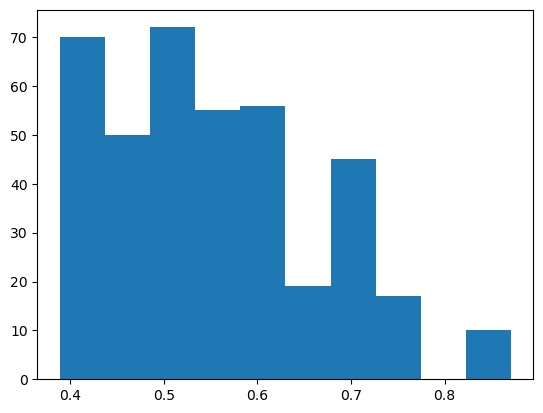

In [25]:
plt.hist(df['NOX']);

## Standardise Variable to Identify Key Feature(s)

In order to perform point 2 properly, one needs to standardise the variable

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
model = LinearRegression()

In [28]:
model.fit(X,y)

LinearRegression()

In [29]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
NOX,17.9690
RM,4.2833
CHAS,2.7694
DIS,1.4585
PTRATIO,0.9146
LSTAT,0.4237
RAD,0.2859
CRIM,0.0976
ZN,0.0489


In [30]:
from sklearn.preprocessing import StandardScaler  
from sklearn.pipeline import make_pipeline  
scaler = StandardScaler()  
standard_coefficient_linear_reg = make_pipeline(scaler, model)

In [31]:
standard_coefficient_linear_reg.fit(X,y)
result = pd.DataFrame(list(zip(standard_coefficient_linear_reg.steps[1][1].coef_, df.columns)), 
                      columns=['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending=False)

,coefficient
name,
LSTAT,3.0924
DIS,3.0569
RM,2.9858
RAD,2.4649
TAX,2.2099
NOX,2.0299
PTRATIO,1.9789
ZN,1.1700
CRIM,0.8970


# Use $R^2$ to Identify Key Features

* Compare $R^2$ of model against $R^2$ of model without a feature. 

* A significant change in $R^2$ signify the importance of the feature.




In [32]:
from sklearn.metrics import r2_score

In [33]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
benchmark = linear_reg.fit()
r2_score(y, benchmark.predict(df))

0.767114948467778

without LSTAT

In [34]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + AGE + DIS + RAD + TAX + PTRATIO + B', 
              data=df)
lr_without_LSTAT = linear_reg.fit()
r2_score(y, lr_without_LSTAT.predict(df))

0.7307798515587487

without AGE

In [35]:
linear_reg = smf.ols(formula = 'y ~ CRIM + ZN + INDUS + CHAS + NOX + RM + DIS + RAD + TAX + PTRATIO + B + LSTAT', 
              data=df)
lr_without_AGE = linear_reg.fit()
r2_score(y, lr_without_AGE.predict(df))

0.7666202220082952

***